In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
% matplotlib inline

/home/lbali/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/lbali/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


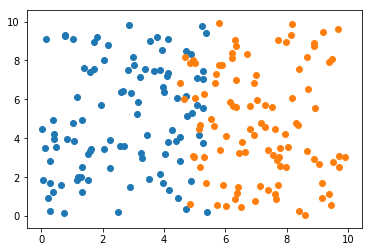

In [10]:
a1 = np.random.uniform(low=0, high=5.5, size=100).reshape(100,1)
a2 = np.random.uniform(low=0, high = 10.0, size=100).reshape(100,1)
y_a = np.zeros((100,1))
b1 = np.random.uniform(low=4.5, high=10.0, size=100).reshape(100,1)
b2 = np.random.uniform(low=0, high = 10.0, size=100).reshape(100,1)
y_b = np.ones((100,1))
X_a = np.concatenate([a1,a2], axis=1)
X_b = np.concatenate([b1,b2], axis=1)
plt.scatter(a1,a2)
plt.scatter(b1,b2)

In [14]:

clasificador = LogisticRegression()
X = np.concatenate([X_a,X_b], axis=0)
y = np.concatenate([y_a, y_b], axis=0).reshape(200)
clasificador.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = clasificador.predict(X)

In [18]:
confusion_matrix(y, y_pred)

array([[87, 13],
       [ 6, 94]])

In [19]:
probabilidades = clasificador.predict_proba(X)
probabilidades

array([[0.92570042, 0.07429958],
       [0.96170359, 0.03829641],
       [0.99008367, 0.00991633],
       [0.99744363, 0.00255637],
       [0.8974594 , 0.1025406 ],
       [0.99063631, 0.00936369],
       [0.40033812, 0.59966188],
       [0.36329646, 0.63670354],
       [0.76861497, 0.23138503],
       [0.61977945, 0.38022055],
       [0.89999462, 0.10000538],
       [0.93294487, 0.06705513],
       [0.97940774, 0.02059226],
       [0.93586657, 0.06413343],
       [0.98452535, 0.01547465],
       [0.51936824, 0.48063176],
       [0.98260359, 0.01739641],
       [0.88969268, 0.11030732],
       [0.6203289 , 0.3796711 ],
       [0.55781928, 0.44218072],
       [0.60394927, 0.39605073],
       [0.77116477, 0.22883523],
       [0.99270159, 0.00729841],
       [0.61472063, 0.38527937],
       [0.99498465, 0.00501535],
       [0.8395408 , 0.1604592 ],
       [0.98406545, 0.01593455],
       [0.33342071, 0.66657929],
       [0.5491076 , 0.4508924 ],
       [0.82152307, 0.17847693],
       [0.

In [20]:
# Graficaremos la frontera de decisión.


In [29]:
x_range = np.linspace(start=0.0, stop=10.0, num=1000)
y_range = np.linspace(start=0.0, stop=10.0, num=1000)

In [30]:
xx,yy = np.meshgrid(x_range, y_range)

In [24]:
xx

array([[ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       ...,
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ]])

In [36]:
x_ravel = xx.ravel()
x_ravel = x_ravel.reshape(len(x_ravel),1)
y_ravel = yy.ravel()
y_ravel = y_ravel.reshape(len(y_ravel),1)
X_predict = np.concatenate([x_ravel, y_ravel], axis=1)

In [28]:
#xx,yy = np.meshgrid([1,2,3], [1,2,3])
#xx
#yy

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [37]:
Z_predict = clasificador.predict(X_predict)

In [38]:
Z_predict

array([0., 0., 0., ..., 1., 1., 1.])

In [40]:
Z_predict = Z_predict.reshape(xx.shape)
Z_predict

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

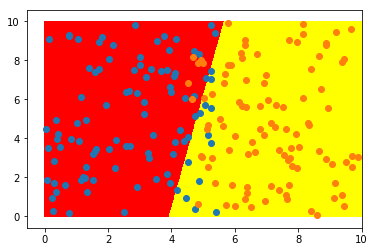

In [41]:
plt.pcolormesh(xx,yy,Z_predict, cmap=plt.cm.autumn)
plt.scatter(a1,a2)
plt.scatter(b1,b2)

In [47]:
probas = clasificador.predict_proba(X_predict)

In [43]:
# Grafica de probabilidades.

In [46]:
probas_clase_0 = probas[:,0].reshape(xx.shape)

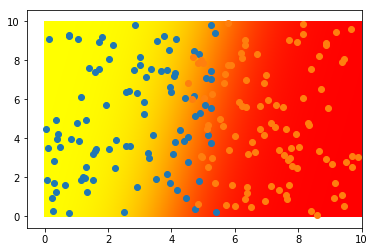

In [48]:
plt.pcolormesh(xx,yy, probas_clase_0, cmap=plt.cm.autumn)
plt.scatter(a1,a2)
plt.scatter(b1,b2)

In [49]:
clasificador.coef_

array([[ 1.11461927, -0.19322931]])

In [50]:
clasificador.intercept_

array([-4.37548361])

Ian Goodfellow
Deep Learning 2016.


Ejercicio

1) Implementar esquemas de training/testing CV con estos datos.

2) Considerar el dataset Abalone, encontrar el "mejor" clasificador para distinguir Adultos (M o F) de Infantes (I).

3) Considerar el dataset "Titanic", y construya el mejor clasificador que pueda, para determinar supervivencia.
